The overall tree performance is given by individual leaves performance ! <br>
When we have a small tree (ex. depth = 2,3 or 4) we can look at leaves details(impurity, # of samples) when we vizualise the whole tree, but when the tree become bigger (ex. depth >=5), it is not effective to search for all the leaves through the big tree. <br>
If you apply decision trees or tree ensembles(RandomForest, GBM) during your daily job or on kaggle competitions, you know that most of the time we need trees with depth >= 5. <br>

In this notebook, you will see how we can interpretate a big tree strucutre using its leaves details.<br>
Right now, the library contains vizualisations for number of samples from leaves. Soon will be added visualisations for leaf criterion (like entropy and gini for tree classifier or mae and mse for tree regressor) and other leaf details.






# Imports

In [1]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/..")

In [2]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.trees import *

import graphviz
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
random_state = 1234

# Load data
We will use the well known dataset, Titanic, to demonstrate all the vizualisations.

In [5]:
dataset = pd.read_csv("../data/titanic/titanic.csv")

In [6]:
dataset.shape

(891, 12)

## EDA

In [7]:
dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Feature engineer

In [11]:
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)

In [12]:
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

# Classification 

## Feature and target variables

In [13]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

## Model training
We will train with full data, the goal is to just interpretate the tree structure

In [14]:
dtc = DecisionTreeClassifier(max_depth=6, random_state=random_state)
dtc.fit(dataset[features], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

## Model interpretation
Here we have a tree with depth=7. Take your time to look through it structure and try to find its leaves.

In [19]:
class_names = list(dtc.classes_)

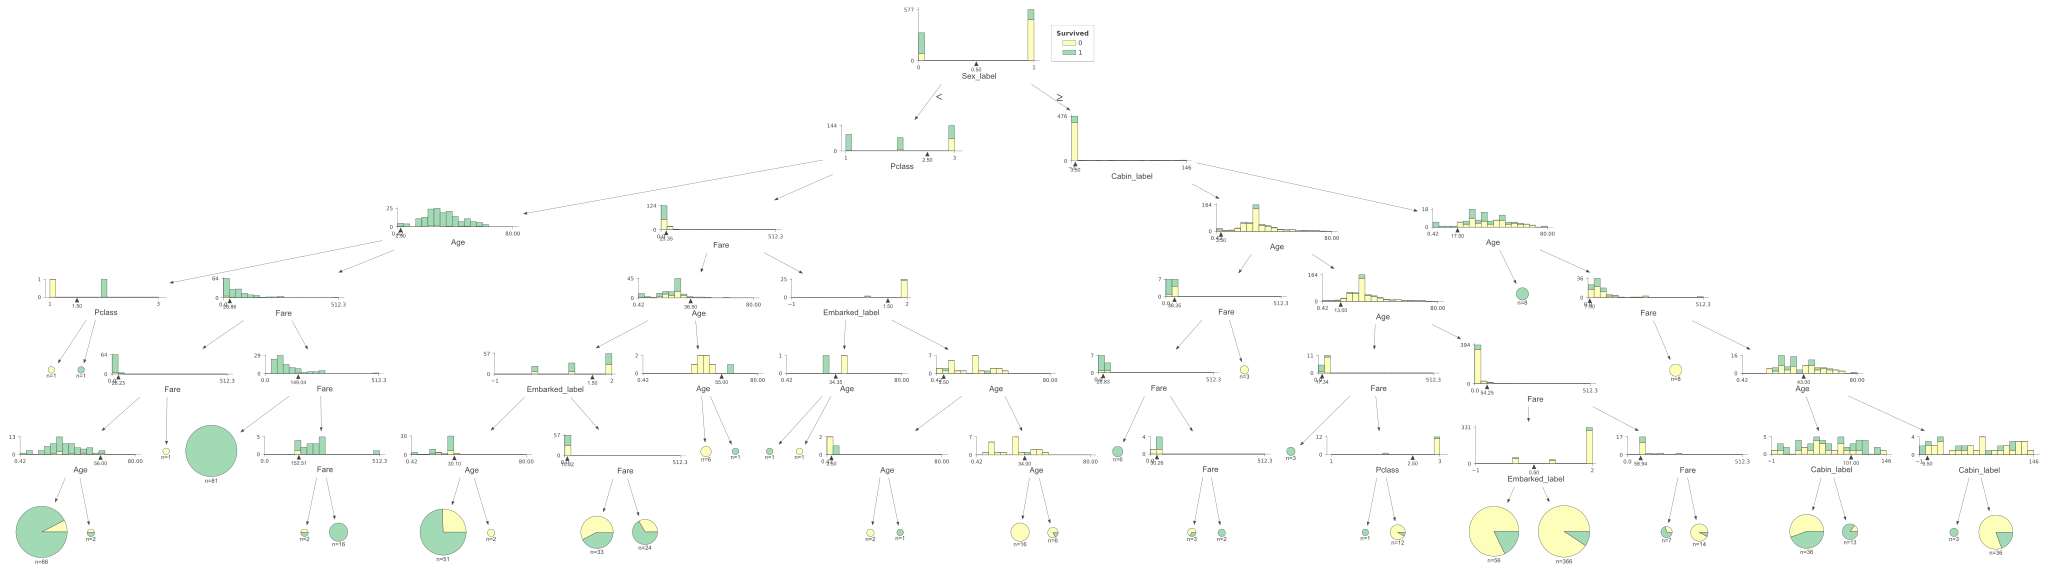

In [20]:
dtreeviz(dtc, dataset[features], dataset[target], features, target, class_names)

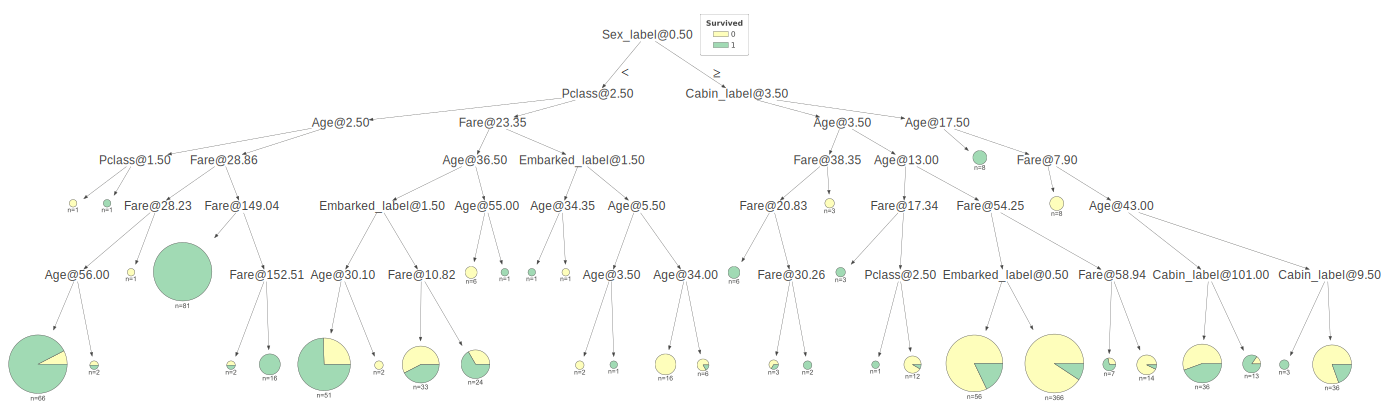

In [22]:
# fancy=False
dtreeviz(dtc, dataset[features], dataset[target], features, target, class_names, fancy=False)

### Sample prediction path interpretation

In [57]:
x = dataset[features].iloc[887]
print(x)

Pclass             1.0
Age               19.0
Fare              30.0
Sex_label          0.0
Cabin_label       30.0
Embarked_label     2.0
Name: 887, dtype: float64


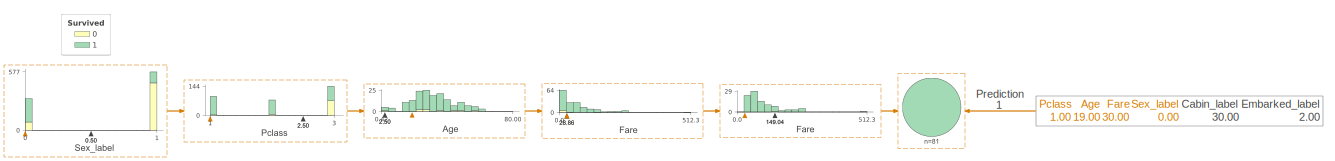

In [60]:
dtreeviz(dtc, dataset[features], dataset[target], features, target, class_names, X=x, show_just_path=True, orientation="LR")

### Leaf samples
Each node contains some important details. One of these is 'samples', which shows the number of samples from training set which pass through that node.<br>
Would be very helpful to see the number of samples from each leaf. Why? Because it shows the confidence of leaf prediction. <br>
For example, if we have a leaf with good prediction(ex. gini=0.0) but very few samples in in (ex. samples=1), this could be the sign of overfiting. If our leaf would contains more samples, then we could be more confident about its prediction. <br>

This is how we can easily get leaf samples from a big tree structure (using plots or plain text)


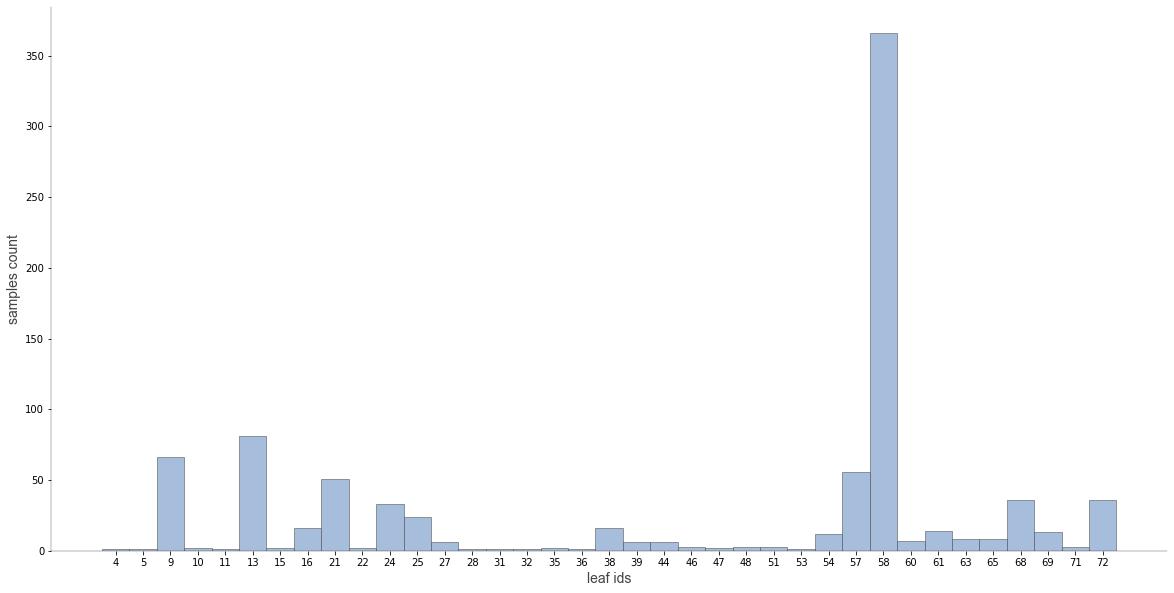

In [51]:
viz_leaf_samples(dtc, figsize=(20,10))

In [52]:
ctreeviz_leaf_samples(dtc, display_type="text")

leaf 4, samples : 1.0, 0.0
leaf 5, samples : 0.0, 1.0
leaf 9, samples : 5.0, 61.0
leaf 10, samples : 1.0, 1.0
leaf 11, samples : 1.0, 0.0
leaf 13, samples : 0.0, 81.0
leaf 15, samples : 1.0, 1.0
leaf 16, samples : 0.0, 16.0
leaf 21, samples : 13.0, 38.0
leaf 22, samples : 2.0, 0.0
leaf 24, samples : 19.0, 14.0
leaf 25, samples : 8.0, 16.0
leaf 27, samples : 6.0, 0.0
leaf 28, samples : 0.0, 1.0
leaf 31, samples : 0.0, 1.0
leaf 32, samples : 1.0, 0.0
leaf 35, samples : 2.0, 0.0
leaf 36, samples : 0.0, 1.0
leaf 38, samples : 16.0, 0.0
leaf 39, samples : 5.0, 1.0
leaf 44, samples : 0.0, 6.0
leaf 46, samples : 2.0, 1.0
leaf 47, samples : 0.0, 2.0
leaf 48, samples : 3.0, 0.0
leaf 51, samples : 0.0, 3.0
leaf 53, samples : 0.0, 1.0
leaf 54, samples : 11.0, 1.0
leaf 57, samples : 46.0, 10.0
leaf 58, samples : 332.0, 34.0
leaf 60, samples : 2.0, 5.0
leaf 61, samples : 13.0, 1.0
leaf 63, samples : 0.0, 8.0
leaf 65, samples : 8.0, 0.0
leaf 68, samples : 20.0, 16.0
leaf 69, samples : 2.0, 11.0
leaf

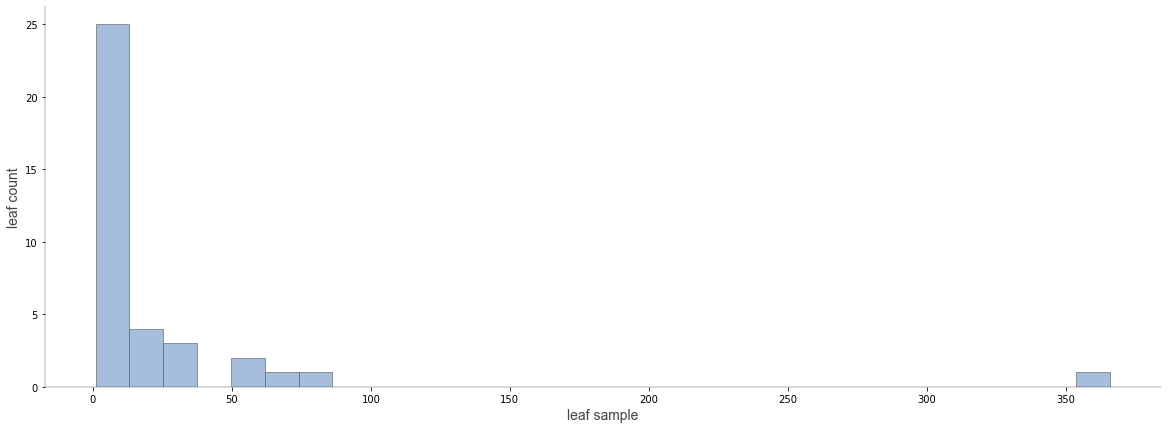

In [53]:
#Useful when you want to easily see the general distribution of leaf samples.
viz_leaf_samples(dtc, display_type="hist", bins=30, figsize=(20,7))

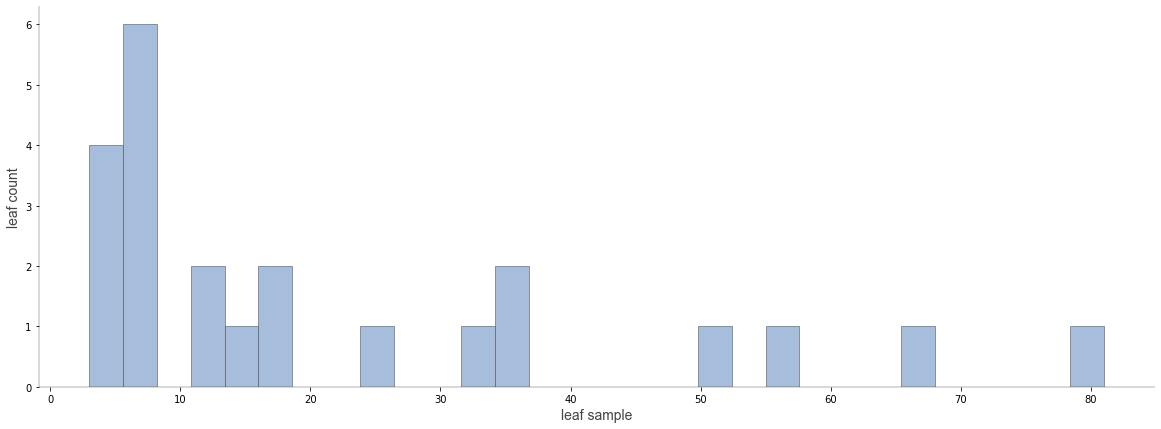

In [54]:
viz_leaf_samples(dtc, display_type="hist", bins=30, figsize=(20,7), min_samples=3, max_samples=100)

### Leaf samples by class
Here we can see the number of samples from each leaf by its classes. <br>
The leaf with id 78 contains a lot of samples from training set and mojority of them from class 0. In leaf 17 all samples are from class 1. Would be very helpful to see how the samples from these leaves look, what do they have in common. This is a way to get domain knowledge about our dataset using a ML driven approach. <br>
More about how we can get the training samples from a leaf in the near future.

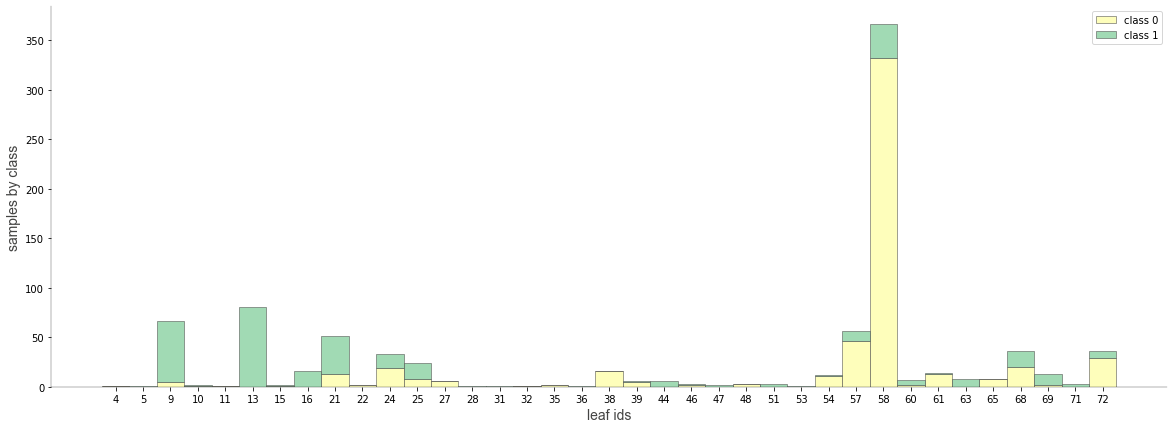

In [55]:
ctreeviz_leaf_samples(dtc, figsize=(20,7))

In [56]:
ctreeviz_leaf_samples(dtc, display_type="text")

leaf 4, samples : 1.0, 0.0
leaf 5, samples : 0.0, 1.0
leaf 9, samples : 5.0, 61.0
leaf 10, samples : 1.0, 1.0
leaf 11, samples : 1.0, 0.0
leaf 13, samples : 0.0, 81.0
leaf 15, samples : 1.0, 1.0
leaf 16, samples : 0.0, 16.0
leaf 21, samples : 13.0, 38.0
leaf 22, samples : 2.0, 0.0
leaf 24, samples : 19.0, 14.0
leaf 25, samples : 8.0, 16.0
leaf 27, samples : 6.0, 0.0
leaf 28, samples : 0.0, 1.0
leaf 31, samples : 0.0, 1.0
leaf 32, samples : 1.0, 0.0
leaf 35, samples : 2.0, 0.0
leaf 36, samples : 0.0, 1.0
leaf 38, samples : 16.0, 0.0
leaf 39, samples : 5.0, 1.0
leaf 44, samples : 0.0, 6.0
leaf 46, samples : 2.0, 1.0
leaf 47, samples : 0.0, 2.0
leaf 48, samples : 3.0, 0.0
leaf 51, samples : 0.0, 3.0
leaf 53, samples : 0.0, 1.0
leaf 54, samples : 11.0, 1.0
leaf 57, samples : 46.0, 10.0
leaf 58, samples : 332.0, 34.0
leaf 60, samples : 2.0, 5.0
leaf 61, samples : 13.0, 1.0
leaf 63, samples : 0.0, 8.0
leaf 65, samples : 8.0, 0.0
leaf 68, samples : 20.0, 16.0
leaf 69, samples : 2.0, 11.0
leaf

# Regression

## feature and target variables
To keep the same dataset for regression, now our task is to predict the age.

In [65]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"

## Model training

In [66]:
dtr = DecisionTreeRegressor(max_depth=7, random_state=random_state)
dtr.fit(dataset[features_reg], dataset[target_reg])

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

## Model interpretation

In [67]:
dtreeviz(dtr, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

### Leaf samples

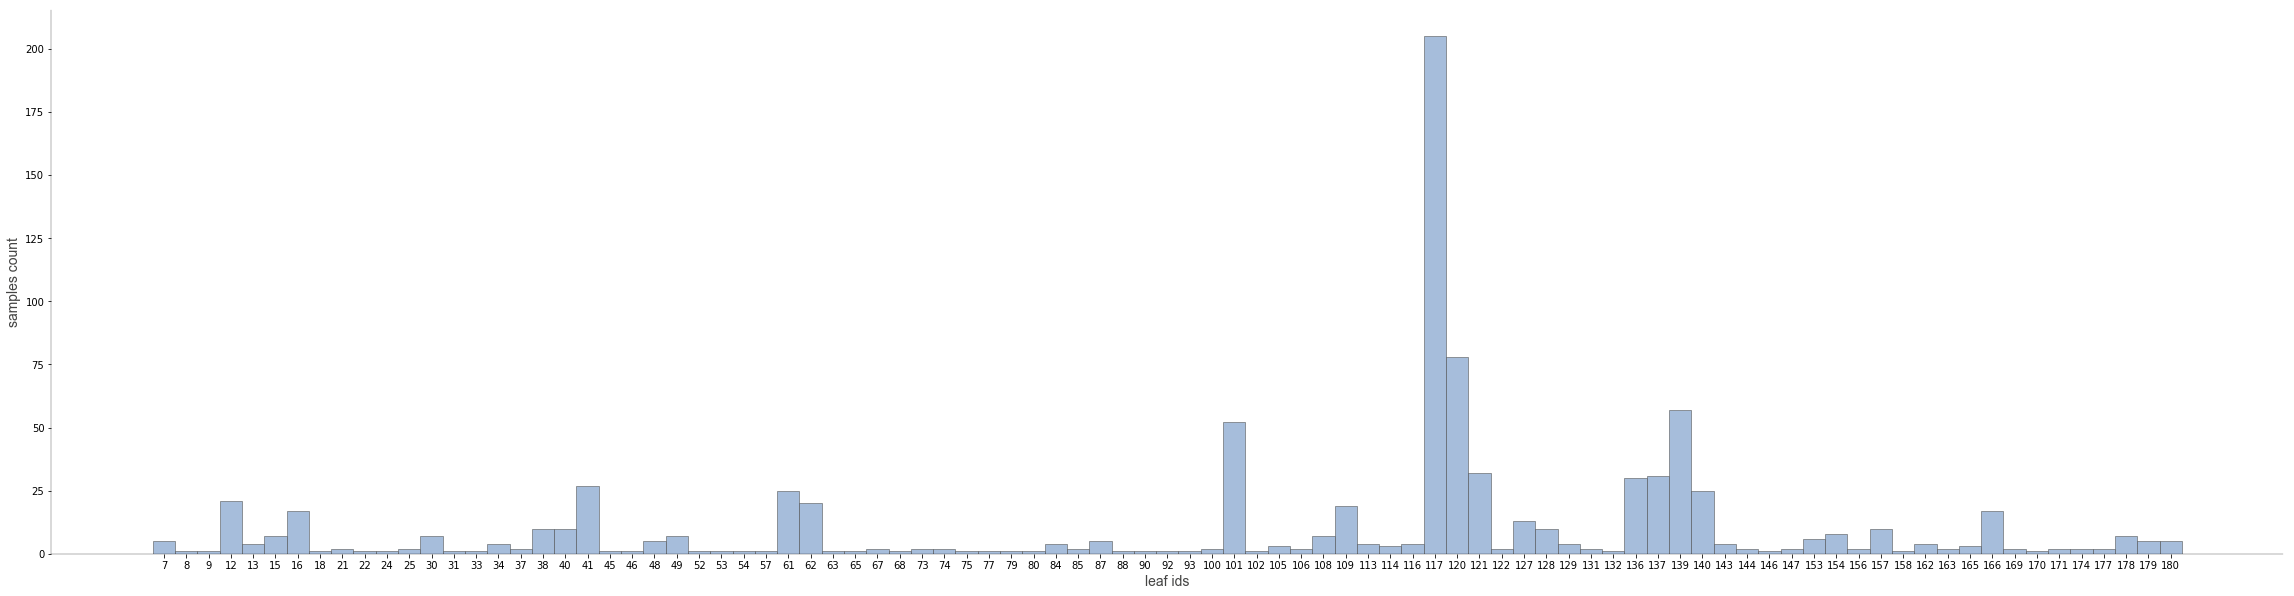

In [68]:
viz_leaf_samples(dtr, figsize=(40,10))

In [69]:
viz_leaf_samples(dtr, display_type="text")

leaf 7 has 5 samples
leaf 8 has 1 samples
leaf 9 has 1 samples
leaf 12 has 21 samples
leaf 13 has 4 samples
leaf 15 has 7 samples
leaf 16 has 17 samples
leaf 18 has 1 samples
leaf 21 has 2 samples
leaf 22 has 1 samples
leaf 24 has 1 samples
leaf 25 has 2 samples
leaf 30 has 7 samples
leaf 31 has 1 samples
leaf 33 has 1 samples
leaf 34 has 4 samples
leaf 37 has 2 samples
leaf 38 has 10 samples
leaf 40 has 10 samples
leaf 41 has 27 samples
leaf 45 has 1 samples
leaf 46 has 1 samples
leaf 48 has 5 samples
leaf 49 has 7 samples
leaf 52 has 1 samples
leaf 53 has 1 samples
leaf 54 has 1 samples
leaf 57 has 1 samples
leaf 61 has 25 samples
leaf 62 has 20 samples
leaf 63 has 1 samples
leaf 65 has 1 samples
leaf 67 has 2 samples
leaf 68 has 1 samples
leaf 73 has 2 samples
leaf 74 has 2 samples
leaf 75 has 1 samples
leaf 77 has 1 samples
leaf 79 has 1 samples
leaf 80 has 1 samples
leaf 84 has 4 samples
leaf 85 has 2 samples
leaf 87 has 5 samples
leaf 88 has 1 samples
leaf 90 has 1 samples
leaf 9

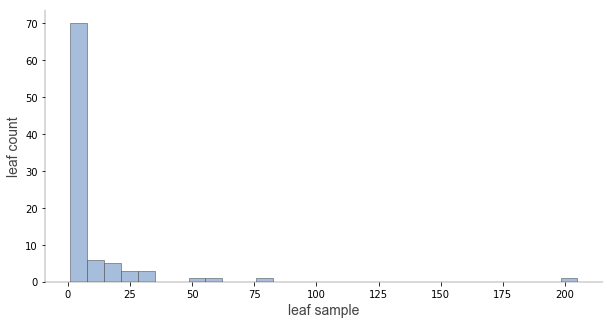

In [70]:
viz_leaf_samples(dtr, display_type="hist", bins=30)

## Leaf target values distribution

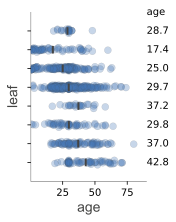

In [74]:
#%config InlineBackend.figure_format = 'svg'
dtr = DecisionTreeRegressor(max_depth=3, random_state=random_state)
dtr.fit(dataset[features_reg], dataset[target_reg])
viz_leaf_target(dtr, dataset[features_reg], dataset[target_reg], features_reg, target_reg, show_leaf_labels=True, grid=False)


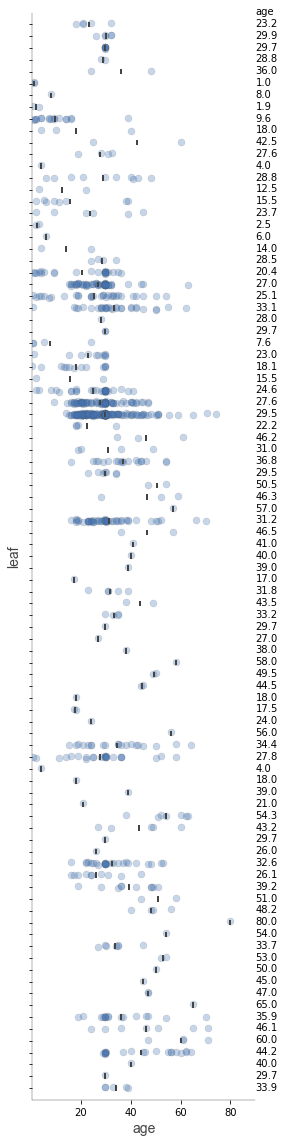

In [72]:
dtr = DecisionTreeRegressor(max_depth=7, random_state=random_state)
dtr.fit(dataset[features_reg], dataset[target_reg])
viz_leaf_target(dtr, dataset[features_reg], dataset[target_reg], features_reg, target_reg, show_leaf_labels=True, grid=False, figsize=(4,20))
